# Neural Net
We'll use the Bank Authentication Data Set from the UCI repository.
The data consists of 5 columns:
* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
+ curtosis of Wavelet Transformed image (continuous)
+ entropy of image (continuous)
+ class (integer)  
Where class indicates whether or not a Bank Note was authentic.

In [1]:
#install.packages('neuralnet',repos = 'http://cran.us.r-project.org')

package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yren\AppData\Local\Temp\RtmpAFgLql\downloaded_packages


In [2]:
library(neuralnet)

Warning message:
"package 'neuralnet' was built under R version 3.3.3"

In [3]:
df <- read.csv('bank_note_data.csv')
head(df)

Image.Var,Image.Skew,Image.Curt,Entropy,Class
3.62160,8.6661,-2.8073,-0.44699,0
4.54590,8.1674,-2.4586,-1.46210,0
3.86600,-2.6383,1.9242,0.10645,0
3.45660,9.5228,-4.0112,-3.59440,0
0.32924,-4.4552,4.5718,-0.98880,0
4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
str(df)

'data.frame':	1372 obs. of  5 variables:
 $ Image.Var : num  3.622 4.546 3.866 3.457 0.329 ...
 $ Image.Skew: num  8.67 8.17 -2.64 9.52 -4.46 ...
 $ Image.Curt: num  -2.81 -2.46 1.92 -4.01 4.57 ...
 $ Entropy   : num  -0.447 -1.462 0.106 -3.594 -0.989 ...
 $ Class     : int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
library(ggplot2)

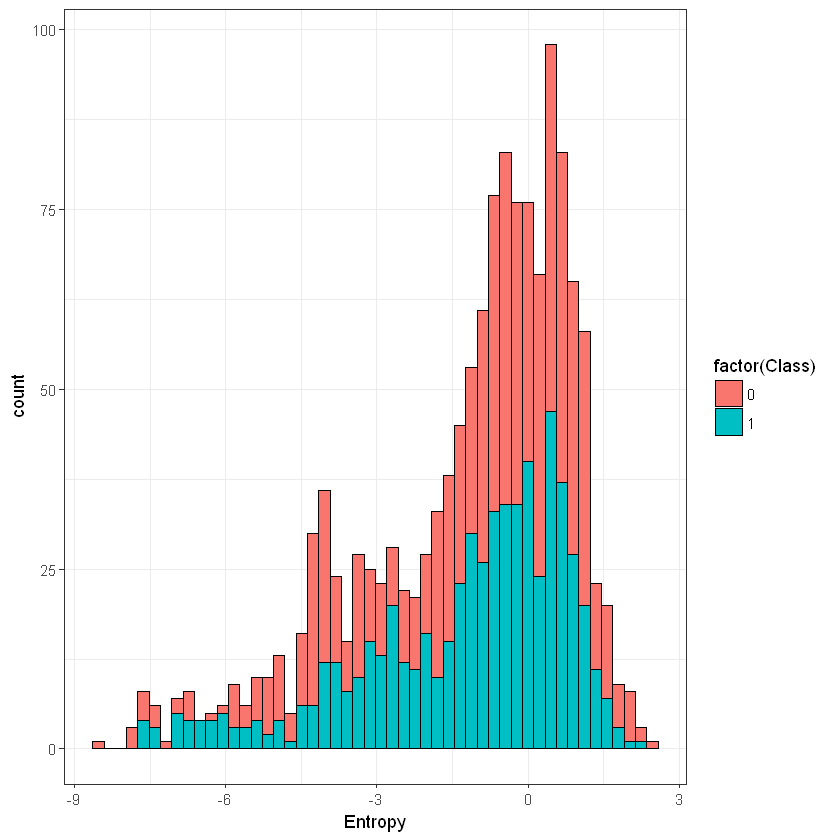

In [6]:
ggplot(df, aes(Entropy)) + geom_histogram(aes(fill=factor(Class)), color='black', bins = 50) + theme_bw()

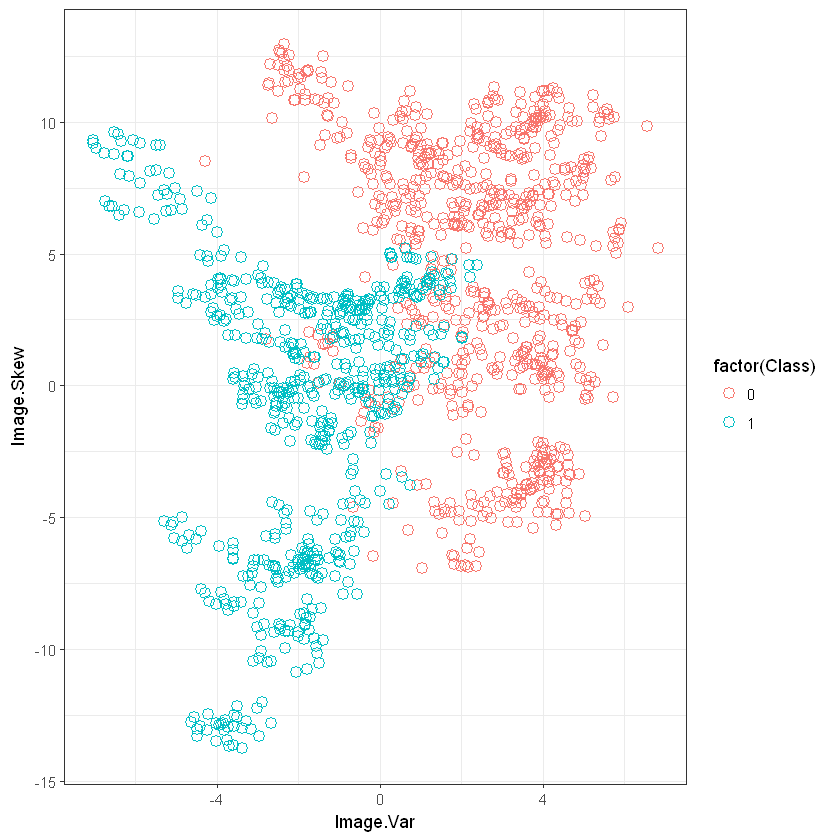

In [7]:
ggplot(df, aes(Image.Var, Image.Skew)) + geom_point(aes(color=factor(Class)), size=3, shape=1) + theme_bw()

In [8]:
library(caTools)

In [9]:
split <- sample.split(df$Class, SplitRatio = 0.7)
train <- subset(df, split==T)
test <- subset(df, split==F)

In [10]:
str(train)

'data.frame':	960 obs. of  5 variables:
 $ Image.Var : num  3.87 3.46 4.37 3.59 2.09 ...
 $ Image.Skew: num  -2.64 9.52 9.67 3.01 -6.81 ...
 $ Image.Curt: num  1.924 -4.011 -3.961 0.729 8.464 ...
 $ Entropy   : num  0.106 -3.594 -3.163 0.564 -0.602 ...
 $ Class     : int  0 0 0 0 0 0 0 0 0 0 ...


In [11]:
help(neuralnet)

In [12]:
nn <- neuralnet(Class ~ Image.Var + Image.Skew + Image.Curt + Entropy, linear.output = F, data = train, hidden = 10)

In [13]:
head(test)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
1,3.62160,8.6661,-2.80730,-0.44699,0
2,4.54590,8.1674,-2.45860,-1.46210,0
5,0.32924,-4.4552,4.57180,-0.98880,0
11,1.22470,8.7779,-2.21350,-0.80647,0
13,1.89930,7.6625,0.15394,-3.11080,0
21,5.78670,7.8902,-2.61960,-0.48708,0


In [14]:
pred <- compute(nn, test[, 1:4])

In [17]:
head(pred$net.result)

1,0.00027575735126
2,0.00001294006757
5,0.02708762570311
11,0.00111480328077
13,0.00001218648723
21,0.00003208131839


In [21]:
pred <- sapply(pred$net.result, round)

In [22]:
table(pred, test$Class)

    
pred   0   1
   0 229   0
   1   0 183

In [23]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [26]:
df$Class <- factor(df$Class)
str(df)

'data.frame':	1372 obs. of  5 variables:
 $ Image.Var : num  3.622 4.546 3.866 3.457 0.329 ...
 $ Image.Skew: num  8.67 8.17 -2.64 9.52 -4.46 ...
 $ Image.Curt: num  -2.81 -2.46 1.92 -4.01 4.57 ...
 $ Entropy   : num  -0.447 -1.462 0.106 -3.594 -0.989 ...
 $ Class     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [27]:
split <- sample.split(df$Class, SplitRatio = 0.7)
train <- subset(df, split==T)
test <- subset(df, split==F)

In [28]:
rf <- randomForest(Class ~ ., data = train)

In [29]:
pred <- predict(rf, test[, 1:4])

In [30]:
head(pred)

1 10 11 13 14 15 
 0  0  0  0  0  0 
Levels: 0 1

In [31]:
table(pred, test$Class)

    
pred   0   1
   0 228   0
   1   1 183

In [32]:
maxs <- apply(df, 2, max) 
mins <- apply(df, 2, min)

In [33]:
maxs

Image.Var       Image.Skew       Image.Curt          Entropy 
    " 6.8248000" " 12.9516000000"    "17.92740000"     " 2.4495000" 
           Class 
             "1"

In [34]:
mins

Image.Var       Image.Skew       Image.Curt          Entropy 
    "-0.0012852" "-10.0712000000"    "-0.00029081"     "-0.0060486" 
           Class 
             "0"